# Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

# Exploring the Data

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

# Building the Model

<Axes: >

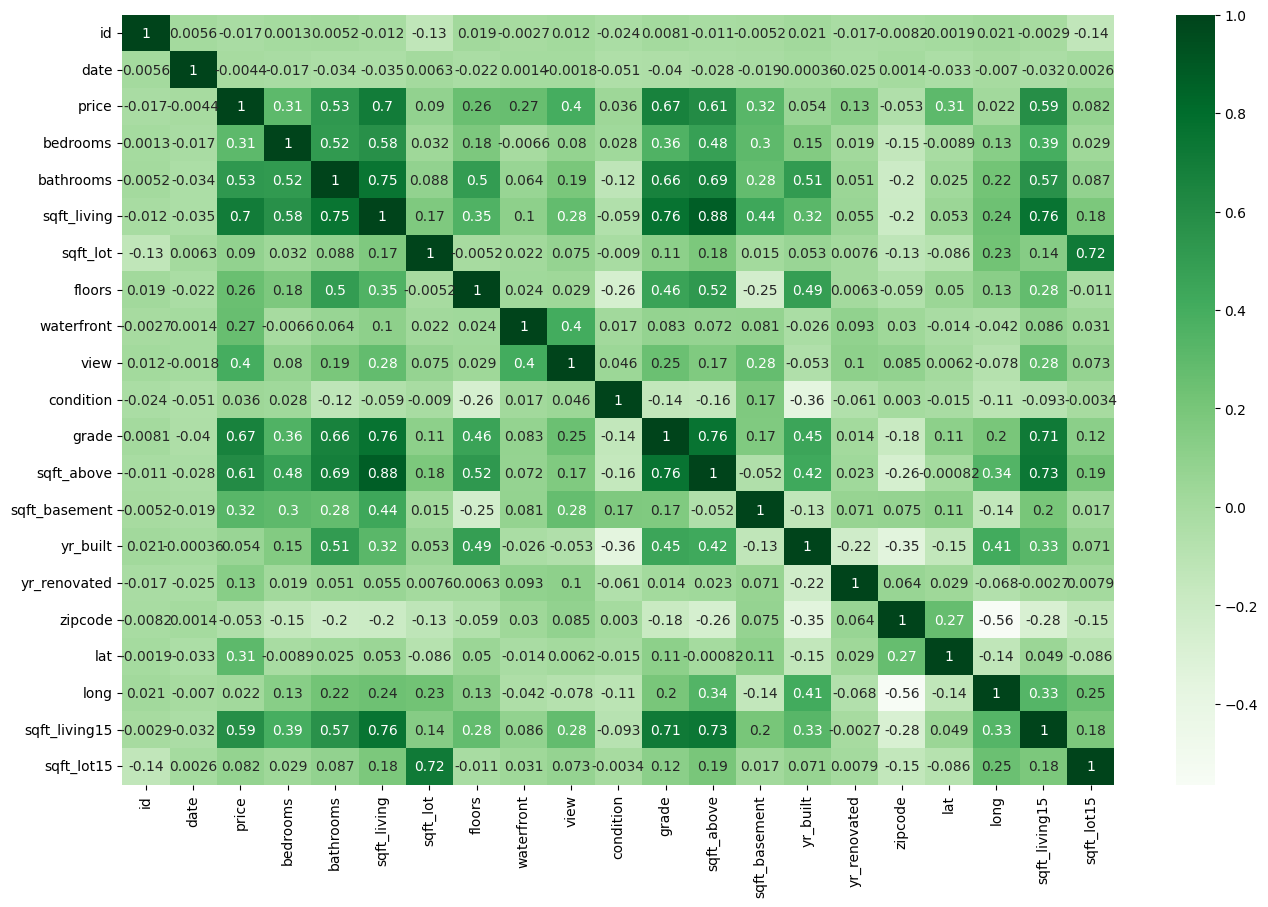

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [9]:
data = df.drop(columns=['id', 'date', 'sqft_lot', 'condition', 'zipcode', 'long', 'sqft_lot15'], axis=1)
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,1955,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1951,1991,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,1933,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,1965,0,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,1987,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,2009,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,2014,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,2009,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,2004,0,47.5345,1410


In [10]:
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,1955,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1951,1991,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,1933,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,1965,0,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,1987,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,2009,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,2014,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,2009,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,2004,0,47.5345,1410


In [11]:
x = data.drop('price' , axis=1)
y = data['price']

In [12]:
x

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15
0,3,1.00,1180,1.0,0,0,7,1180,0,1955,0,47.5112,1340
1,3,2.25,2570,2.0,0,0,7,2170,400,1951,1991,47.7210,1690
2,2,1.00,770,1.0,0,0,6,770,0,1933,0,47.7379,2720
3,4,3.00,1960,1.0,0,0,7,1050,910,1965,0,47.5208,1360
4,3,2.00,1680,1.0,0,0,8,1680,0,1987,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,8,1530,0,2009,0,47.6993,1530
21609,4,2.50,2310,2.0,0,0,8,2310,0,2014,0,47.5107,1830
21610,2,0.75,1020,2.0,0,0,7,1020,0,2009,0,47.5944,1020
21611,3,2.50,1600,2.0,0,0,8,1600,0,2004,0,47.5345,1410


In [13]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [14]:
model = linear_model.LinearRegression()

In [15]:
model.fit(x,y)

LinearRegression()

In [16]:
model.score(x,y)

0.6911602724729005